## M.ª de los Ángeles Martín de la Cruz

## **Cuaderno demo: Panda, Numpy, MatPlotLib, funciones anónimas y carga de ficheros**

24_25


# Introducción a Numpy y Panda

Web: [Numpy](https://numpy.org/)

Web: [Pandas](https://pandas.pydata.org/)

Web: [Matplotlib](https://matplotlib.org/)

Web: [Scipy](https://scipy.org/)

Web: [Scikit-learn](https://scikit-learn.org/stable/)

In [ ]:
import matplotlib
# CARGAMOS LIBRERIAS
# ==============================================================================
# Importamos la librería NUMPY para CÁLCULO NUMÉRICO Y ANÁLISIS DE DATOS
import numpy as np
# PANDAS para MANIPULACIÓN y ANÁLISIS DE DATOS
import pandas as pd
# MATPLOTLIB para GRAFICOS
import matplotlib.pyplot as plt
# SCIPY para CÁLCULO MATEMÁTICO
import scipy # necesario para conocer la versión
import scipy.stats as st
# Preprocesado
#==============================================================================
import sklearn # necesario para conocer la versión
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
# Versiones
#==============================================================================
version_np = np.version.version
version_pd = pd.__version__
version_plt = matplotlib.__version__
version_scipy = scipy.__version__
version_sklearn = sklearn.__version__


**Creación de objetos:**

1.   Objeto array (numpy)
2.   Objeto DataFrame (pandas)



**Objeto array** Todos los datos del mismo tipo (dtype)

In [ ]:
# creación de una matriz de números floats
x=np.array([[1.,2,3, 4],[5,6,7,8],[9,10,11,12]])
x

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

In [ ]:
# tipo de datos
x.dtype

dtype('float64')

In [ ]:
# array con contenido de cadenas
x_txt=np.array([['a','b','c'],['d','e','f'],['g','h','i']])
x_txt.dtype # <U1 --> Significa tipo de dato unicode de longitud 1


dtype('<U1')

In [ ]:
# Acceso a elementos x[filas,columnas]
# Atención: empieza a numerar desde el 0
x[0,0]

1.0

In [ ]:
# También se puede utilizar
x[0][0]

1.0

In [ ]:
# Columna 2
x[:,1]

array([ 2.,  6., 10.])

In [ ]:
# Ejer 1: Mostrar la columa 4
x[:,3]

array([ 4.,  8., 12.])

In [ ]:
# Fila 2
x[1,:]

array([5., 6., 7., 8.])

In [ ]:
#Ejer 2: mostrar la fila 1
x[0,:]

array([1., 2., 3., 4.])

In [ ]:
# Extraer la submatriz columnas 2 y 4
x_new=x[:,[1,3]]
x_new

array([[ 2.,  4.],
       [ 6.,  8.],
       [10., 12.]])

In [ ]:
#Ejer 3: Extraer la submatriz de las filas 1 y 3


In [ ]:
# Ejer 3: Extraer la submatriz de las filas 1 y 3
x_new = x[[0, 2], :]  # Se seleccionan las filas 1 (índice 0) y 3 (índice 2)
x_new


array([[ 1.,  2.,  3.,  4.],
       [ 9., 10., 11., 12.]])

**Definición 1:** Crear un dataframe directamente

**¿Qué es un dataframe?**

Un DataFrame es una estructura de datos con dos dimensiones en la cual se puede guardar datos de distintos tipos (como caractéres, enteros, valores de punto flotante, factores y más) en columnas. Es similar a una hoja de cálculo o una tabla de SQL o el data.frame de R. Un DataFrame siempre tiene un índice (con inicio en 0). El índice refiere a la posición de un elemento en la estructura de datos.

Título: [Comenzando con datos](https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/)


**Objeto DataFrame** Las columnas de la tabla pueden tener diferentes *dtype*

In [ ]:
# Definición de DataFrame
df=pd.DataFrame(
    {"A": 1.0,
     "B": pd.Categorical(["H","H","H","M","M"]),
     "C": np.array([1., 2., 3., 4., 5.]),
    }
)

In [ ]:
# visualización del objeto DataFrame df
df

,A,B,C
0,1.0,H,1.0
1,1.0,H,2.0
2,1.0,H,3.0
3,1.0,M,4.0
4,1.0,M,5.0


In [ ]:
df.dtypes

,0
A,float64
B,category
C,float64


In [ ]:
#Resumen estadística basica descriptiva
df.describe()

,A,C
count,5.0,5.000000
mean,1.0,3.000000
std,0.0,1.581139
min,1.0,1.000000
25%,1.0,2.000000
50%,1.0,3.000000
75%,1.0,4.000000
max,1.0,5.000000


In [ ]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)



In [ ]:
#Ejer 4: crear un dataframe con una lista (ficticia) de municipios de Gran canaria y el número de habitantes separados por géneros (Masculino, Femenino, etc...)
import pandas as pd

# Crear un DataFrame con los datos ficticios de los municipios de Gran Canaria
data = {
    "Municipio": ["Las Palmas de Gran Canaria", "Telde", "Mogán", "San Bartolomé de Tirajana", "Arucas"],
    "Masculino": [250000, 100000, 35000, 150000, 45000],
    "Femenino": [260000, 105000, 37000, 155000, 47000],
    "Total Habitantes": [510000, 205000, 72000, 305000, 92000]
}

# Crear el DataFrame
df_municipios = pd.DataFrame(data)

# Visualizar el DataFrame
print(df_municipios)

# Ver los tipos de datos
print(df_municipios.dtypes)

# Resumen estadístico básico descriptivo
print(df_municipios.describe())

                    Municipio  Masculino  Femenino  Total Habitantes
0  Las Palmas de Gran Canaria     250000    260000            510000
1                       Telde     100000    105000            205000
2                       Mogán      35000     37000             72000
3   San Bartolomé de Tirajana     150000    155000            305000
4                      Arucas      45000     47000             92000
Municipio           object
Masculino            int64
Femenino             int64
Total Habitantes     int64
dtype: object
          Masculino       Femenino  Total Habitantes
count       5.00000       5.000000          5.000000
mean   116000.00000  120800.000000     236800.000000
std     87991.47686   91193.201501     179183.425573
min     35000.00000   37000.000000      72000.000000
25%     45000.00000   47000.000000      92000.000000
50%    100000.00000  105000.000000     205000.000000
75%    150000.00000  155000.000000     305000.000000
max    250000.00000  260000.000000     5

In [ ]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna


In [ ]:
#Ejer 5: Mostrar los tipos de datos asociados a cada columna
print(df_municipios.dtypes)

Municipio           object
Masculino            int64
Femenino             int64
Total Habitantes     int64
dtype: object


In [ ]:
#Ejer 6: modificar uno o más valores de una de las columnas


In [ ]:
# Ejer 6: Modificar un valor específico en la columna "Masculino"
df_municipios.loc[df_municipios['Municipio'] == 'Las Palmas de Gran Canaria', 'Masculino'] = 300000

# Mostrar el DataFrame actualizado
print(df_municipios)


                    Municipio  Masculino  Femenino  Total Habitantes
0  Las Palmas de Gran Canaria     300000    260000            510000
1                       Telde     100000    105000            205000
2                       Mogán      35000     37000             72000
3   San Bartolomé de Tirajana     150000    155000            305000
4                      Arucas      45000     47000             92000


In [ ]:
#Ejer 7: Cambiar alguno de los valores de forma directa


In [ ]:
# Ejer 7: Modificar el valor directamente de la columna "Masculino" en la fila correspondiente
df_municipios.at[0, 'Masculino'] = 280000  # Cambia el valor en la primera fila (index 0) y en la columna 'Masculino'

# Mostrar el DataFrame actualizado
print(df_municipios)


                    Municipio  Masculino  Femenino  Total Habitantes
0  Las Palmas de Gran Canaria     280000    260000            510000
1                       Telde     100000    105000            205000
2                       Mogán      35000     37000             72000
3   San Bartolomé de Tirajana     150000    155000            305000
4                      Arucas      45000     47000             92000


In [ ]:
#Ejer 8: Obtener estadística basica descriptiva


In [ ]:
# Ejer 8: Obtener estadística básica descriptiva del DataFrame
df_estadisticas = df_municipios.describe()

# Mostrar el resumen estadístico
print(df_estadisticas)


           Masculino       Femenino  Total Habitantes
count       5.000000       5.000000          5.000000
mean   122000.000000  120800.000000     236800.000000
std     99661.928538   91193.201501     179183.425573
min     35000.000000   37000.000000      72000.000000
25%     45000.000000   47000.000000      92000.000000
50%    100000.000000  105000.000000     205000.000000
75%    150000.000000  155000.000000     305000.000000
max    280000.000000  260000.000000     510000.000000


**Definición 2**: a partir de un objeto array (creado con numpy) crear un dataframe

In [ ]:
# creamos 70 fechas consecutivas iniciando en el día 10-sep-2022, (en inglés, 20220910)
fechas = pd.date_range("20220910", periods=70)
fechas

DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [ ]:
# x-> datos, index-> nombre de filas (es la forma con la que se podrán identificar cada fila), colums-> nombre de columnas
# Generamos una matriz de 70 filas por 2 columnas de números aleatorios "normales" (Distribución normal)
# de media 0 y desviación típica 1
df_fechas = pd.DataFrame(np.random.randn(70, 2),index=fechas,columns=["col1","col2"])
df_fechas

,col1,col2
2022-09-10,0.311782,-0.960597
2022-09-11,-0.414486,0.910578
2022-09-12,0.386623,-2.232536
2022-09-13,0.220495,0.100122
2022-09-14,0.987540,0.148957
...,...,...
2022-11-14,0.524124,0.652534
2022-11-15,-2.235066,-1.100942
2022-11-16,0.446836,0.747524
2022-11-17,-0.836058,1.659268


In [ ]:
# Metodos objeto.metodo df.< TAB >
# Ejemplos: situate al final del comando + barra espaciadora
#           df.head() primeros registros
#           df.tail() ultimos registros
#           df.index() nombre de las filas
#           df.columns()  nombre de las columnas
#           df.describe() estadística basica descriptiva
#           df.T() transpuesta
df_fechas.describe()

,col1,col2
count,70.000000,70.000000
mean,-0.089044,0.174778
std,1.066752,0.968782
min,-2.835547,-2.232536
25%,-0.807081,-0.493895
50%,-0.027621,0.162066
75%,0.515038,0.890423
max,2.427238,2.034168


In [ ]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos
#           df_fechas.head() primeros registros
#           df_fechas.tail() ultimos registros
#           df_fechas.index nombre de las filas
#           df_fechas.columns  nombre de las columnas
#           df_fechas.describe() estadística basica descriptiva
#           df_fechas.T transpuesta


In [ ]:
#Ejer 9: realizar un ejemplo de cada uno de los siguientes comandos

In [ ]:
# Mostrar los primeros 5 registros del DataFrame
print(df_fechas.head())


                col1      col2
2022-09-10  0.311782 -0.960597
2022-09-11 -0.414486  0.910578
2022-09-12  0.386623 -2.232536
2022-09-13  0.220495  0.100122
2022-09-14  0.987540  0.148957


In [ ]:
# Mostrar los últimos 5 registros del DataFrame
print(df_fechas.tail())


                col1      col2
2022-11-14  0.524124  0.652534
2022-11-15 -2.235066 -1.100942
2022-11-16  0.446836  0.747524
2022-11-17 -0.836058  1.659268
2022-11-18 -0.330383 -0.133927


In [ ]:
# Mostrar el índice (nombres de las filas) del DataFrame
print(df_fechas.index)


DatetimeIndex(['2022-09-10', '2022-09-11', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
               '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
               '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21', '2022-10-22', '2022-10-23',
               '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31',
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
      

In [ ]:
# Mostrar los nombres de las columnas del DataFrame
print(df_fechas.columns)


Index(['col1', 'col2'], dtype='object')


In [ ]:
# Mostrar estadísticas básicas descriptivas del DataFrame
print(df_fechas.describe())


            col1       col2
count  70.000000  70.000000
mean   -0.089044   0.174778
std     1.066752   0.968782
min    -2.835547  -2.232536
25%    -0.807081  -0.493895
50%    -0.027621   0.162066
75%     0.515038   0.890423
max     2.427238   2.034168


In [ ]:
# Mostrar la transposición del DataFrame
print(df_fechas.T)


      2022-09-10  2022-09-11  2022-09-12  2022-09-13  2022-09-14  2022-09-15  \
col1    0.311782   -0.414486    0.386623    0.220495    0.987540    0.282973   
col2   -0.960597    0.910578   -2.232536    0.100122    0.148957    1.192642   

      2022-09-16  2022-09-17  2022-09-18  2022-09-19  ...  2022-11-09  \
col1    1.408548   -1.540067    1.748090   -2.150343  ...    0.264153   
col2    1.205060    1.900015    2.034168    1.552793  ...    1.299618   

      2022-11-10  2022-11-11  2022-11-12  2022-11-13  2022-11-14  2022-11-15  \
col1    0.536618   -0.568181    0.664469    1.892848    0.524124   -2.235066   
col2    1.140707   -0.278206    0.371194   -0.860046    0.652534   -1.100942   

      2022-11-16  2022-11-17  2022-11-18  
col1    0.446836   -0.836058   -0.330383  
col2    0.747524    1.659268   -0.133927  

[2 rows x 70 columns]



**Selección de registros**

*   Por etiquetas
*   Por posición
*   Por condición booleana








In [ ]:
# Selección de columnas (variable)
# Varias columnas df[["col1","col2"]]
df_fechas[["col2"]]


,col2
2022-09-10,-0.960597
2022-09-11,0.910578
2022-09-12,-2.232536
2022-09-13,0.100122
2022-09-14,0.148957
...,...
2022-11-14,0.652534
2022-11-15,-1.100942
2022-11-16,0.747524
2022-11-17,1.659268


In [ ]:
# Selección de filas
# del 01 al 31 de octubre
df_fechas["20221001":"20221031"]

,col1,col2
2022-10-01,0.002152,0.802061
2022-10-02,2.185970,-1.698538
2022-10-03,-0.514994,1.111663
2022-10-04,-0.422527,0.793360
2022-10-05,-0.167362,-0.786639
2022-10-06,-0.047570,-0.970964
2022-10-07,0.334922,0.175175
2022-10-08,-2.835547,0.033607
2022-10-09,-0.200009,-1.021092
2022-10-10,-1.303119,-0.120805


In [ ]:
# Selección de submatriz (slice)
# Método .loc selección por etiquetas
df_fechas.loc["20220920":"20220930", ["col1", "col2"]]


,col1,col2
2022-09-20,-0.060442,-0.963081
2022-09-21,-1.164948,0.531415
2022-09-22,-0.744250,-0.172797
2022-09-23,-0.956203,-0.515800
2022-09-24,0.024580,0.197244
2022-09-25,-1.434352,-0.119320
2022-09-26,-0.782971,-0.369076
2022-09-27,-1.172988,0.094625
2022-09-28,-0.007673,1.372101
2022-09-29,0.198236,-1.565619


In [ ]:
# Selección por posición
# df.iloc[filas, columnas]
# df.iloc[ posiciones 1, 2, 3 , 4, posiciones 0]
# df.iloc[ filas 2, 3, 4, 5, columna 1]
df.iloc[1:5, 0:1]

,A
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
# Selección por condición booleana
# Nos quedamos con los datos que tienen un valor positivo en la columna indicada
df1=df[df["C"]>3]
df1

,A,B,C
3,1.0,M,4.0
4,1.0,M,5.0


**El método apply**: se combina una funcionalidad de Numpy en un objeto dataframe

In [ ]:
# aplicamos la función suma acumulada definida en numpy a nuestros datos (dataframe)
df_fechas.apply(np.cumsum)

,col1,col2
2022-09-10,0.311782,-0.960597
2022-09-11,-0.102703,-0.050019
2022-09-12,0.283920,-2.282555
2022-09-13,0.504414,-2.182433
2022-09-14,1.491954,-2.033476
...,...,...
2022-11-14,-3.278378,11.062547
2022-11-15,-5.513444,9.961605
2022-11-16,-5.066607,10.709129
2022-11-17,-5.902666,12.368397


**Definición de funciones anónimas**

In [ ]:
# La función x toma el argumento a, le suma 10 y lo devuelve
mi_funcion_anonima = lambda a : a + 10
print(mi_funcion_anonima(5))

15


In [ ]:
mi_funcion_anonima_1 = lambda a, b : a * b
print(mi_funcion_anonima_1(5, 6))

30


In [ ]:
df['C']

,C
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [ ]:
df['C'].max()

5.0

In [ ]:
df['C'].min()

1.0

In [ ]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna


In [ ]:
#Ejer 10: Crear una función anónima denomminada mi_funcion_rango, que pasándole por parámetro la columna "C" de df obtenga el rango
#      de los valores que forman parte de dicha columna

# Crear la función anónima que calcule el rango de la columna "C"
mi_funcion_rango = lambda x: x.max() - x.min()

# Aplicar la función anónima a la columna "C" de df
rango_columna_C = mi_funcion_rango(df['C'])

# Mostrar el resultado
print(rango_columna_C)


4.0


A continuación tenemos unos accesos que nos permitiran conocer de forma rápida las librerías de Matplotlib y Pandas

[introducción rápida a Matplotlib](https://aprendeconalf.es/docencia/python/manual/matplotlib/#integraci%C3%B3n-con-pandas)

[Introducción rápida a Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

# **Ya podemos empezar**

In [ ]:

# Descargar el dataset que se utilizará utilizaNdo un enlace compartido de google drive
# Si la URL es https://drive.google.com/file/d/IDFICHEROCOMPARTIDO se debe utilizar:
# !gdown --id IDFICHEROCOMPARTIDO
# En nuestro caso, hemos de hacer uso de parte de la información que hay en el siguiente enlace, que corresponde
# con elenlace cunado se comparte un fichero:
#
# https://drive.google.com/file/d/18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5/view?usp=sharing
#
# Este comando Linux, solo funciona en Google Colab, no en local
# Con la exclamación ! ejecutamos un comando (programa) Linux que se ejecuta en la máquina virtual
!gdown --id 18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
#
# Ignorar el mensaje que se muestra al ejecutarse, indicando que el comando -id is deprecated
#
# Una vez ha sido descargado a nuestros recursos de  Google Colab, como recurso de este cuaderno, es interesante descargarlo
# y abrirlo con alguna herramienta  ono Notepad++ o LibreOffice


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18vnxFKW097DjW5TMR8sYHG-nYfGmkqj5
To: /content/datos.csv
100% 427/427 [00:00<00:00, 2.15MB/s]


In [ ]:
# Cargamos el fichero csv  denominado datos.csv con
Datos= pd.read_csv('datos.csv', delimiter=';')
# importante--> OBSERVAR que Datos es un DataFrame como el df que se ha trabajado anteriormente
# Mostrar filas y columnas de la matriz de datos
Datos.shape

(19, 3)

In [ ]:
# Mostramos el contenido de los datos (variables)
# Contiene la renta media en 2020 por comunidades y la variación de rentas (en porcentajes) respecto al año anterior
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Mostramos las comunidades autónomas
Datos["Comunidad"]

,Comunidad
0,ANDALUCIA
1,ARAGON
2,ASTURIAS
3,BALEARS
4,CANARIAS
5,CANTABRIA
6,CASTILLA Y LEON
7,CASTILLA Y LA MANCHA
8,CATALUNYA
9,VALENCIA


In [ ]:
# Le cambiamos el nombre de la comunidad de CANARIAS a Islas Canarias
Datos.iloc[4,0]='Islas Canarias'

Datos


,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,Islas Canarias,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
#Ejer 11: Volver a cambiar a CANARIAS
Datos.iloc[4,0]= 'CANARIAS'
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
Datos.describe()

,Renta,DiferenciaRenta
count,19.000000,19.000000
mean,22795.684211,-9.726316
std,4542.137982,4.164245
min,17448.000000,-22.700000
25%,19464.000000,-10.150000
50%,21903.000000,-8.600000
75%,26113.000000,-7.450000
max,32048.000000,-5.200000


**Objeto matriz de numpy**

In [ ]:
# Transformamos una parte del objeto DataFrame a un objeto matriz para trabajar con métodos de numpy
DatosMatriz=Datos[["Renta", "DiferenciaRenta"]].to_numpy()
DatosMatriz

# Por curiosidad, fijarse como los datos de Canarias coinciden en la fila (al igual que el resto de los datos...)


array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Visualizar DatosMatriz**

In [ ]:
DatosMatriz

array([[ 1.7747e+04, -9.1000e+00],
       [ 2.6512e+04, -7.8000e+00],
       [ 2.1149e+04, -9.0000e+00],
       [ 2.2048e+04, -2.2700e+01],
       [ 1.7448e+04, -1.8400e+01],
       [ 2.2096e+04, -9.3000e+00],
       [ 2.3167e+04, -7.0000e+00],
       [ 1.9369e+04, -7.1000e+00],
       [ 2.7812e+04, -1.0900e+01],
       [ 2.0792e+04, -9.9000e+00],
       [ 1.8301e+04, -5.2000e+00],
       [ 2.1903e+04, -8.1000e+00],
       [ 3.2048e+04, -1.1100e+01],
       [ 1.9838e+04, -8.1000e+00],
       [ 2.9314e+04, -8.5000e+00],
       [ 3.0401e+04, -1.0400e+01],
       [ 2.5714e+04, -8.6000e+00],
       [ 1.9559e+04, -6.7000e+00],
       [ 1.7900e+04, -6.9000e+00]])

**Cálculo de la media y desviación típica**

In [ ]:
np.mean(DatosMatriz,axis=0) # Calcula la media aritmetica de los datos,
                      # (por columnas) axis=1 para calcular la media por filas

array([ 2.27956842e+04, -9.72631579e+00])

**Librería matplotlib: Histograma**

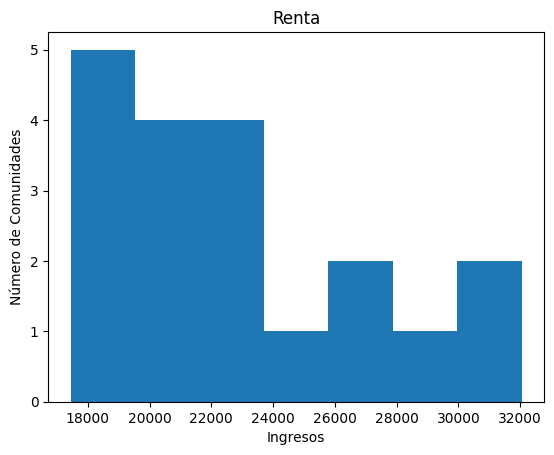

In [ ]:
# Para mostrar en el histograma los datos de ingresos hemos de indicar que queremos todas las filas de la primera columna
plt.hist(DatosMatriz[:,0],7 ) # recordar, columna 0 = primera variable y el 7 indica el número de grupos(columnas) a mostrar
#plt.hist(DatosMatriz[:,0]) # recordar, columna 0 = primera variable
plt.ylabel('Número de Comunidades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()

In [ ]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta
#      Apartado 1: Renta entre 26000€ y 28000€
#      Apartado 2: Renta superior a 30000€


In [ ]:
#Ejer 12: Filtrando los datos en el dataframe Datos, identificar las comunidades autónomas cuya renta

# Apartado 1: Filtrar comunidades cuya renta está entre 26,000€ y 28,000€
filtro_renta_26_28 = Datos[(Datos["Renta"] >= 26000) & (Datos["Renta"] <= 28000)]
print("Comunidades con renta entre 26,000€ y 28,000€:")
print(filtro_renta_26_28[["Comunidad", "Renta"]])

# Apartado 2: Filtrar comunidades cuya renta es superior a 30,000€
filtro_renta_30k = Datos[Datos["Renta"] > 30000]
print("\nComunidades con renta superior a 30,000€:")
print(filtro_renta_30k[["Comunidad", "Renta"]])


Comunidades con renta entre 26,000€ y 28,000€:
   Comunidad  Renta
1     ARAGON  26512
8  CATALUNYA  27812

Comunidades con renta superior a 30,000€:
     Comunidad  Renta
12      MADRID  32048
15  PAIS VASCO  30401


¿Y si queremos visualizar la diferencia de ingresos?

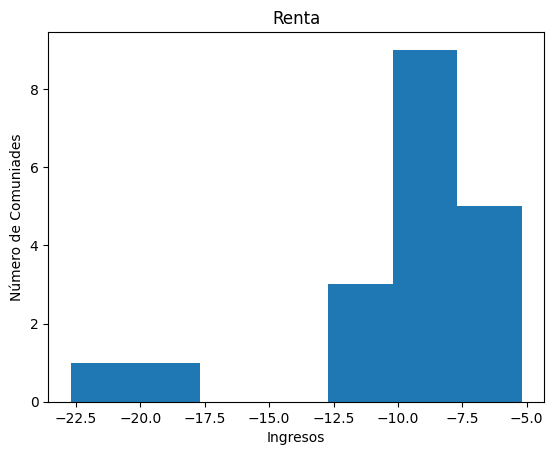

In [ ]:
plt.hist(DatosMatriz[:,1],7 ) # columna 1 = segunda variable
plt.ylabel('Número de Comuniades')
plt.xlabel('Ingresos')
plt.title('Renta')
plt.show()



# Vamos a analizar los datos de muestra de las comunidades autónomas para la Detección de **outliers**
Adaptación del cuaderno **Ejemplo 2.3 Outliers.ipynb**

In [ ]:
Ingresos=DatosMatriz[:,0] # Ingresos medios
datos=Ingresos # para reutilizar el código

**MÉTODO 1:**  Basado en la distribución normal

In [ ]:
# CRITERIO 1: PROBABILIDAD GLOBAL
# probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global de una cola
alfa_g=(1-p_g)/2
# probabilidad  de las colas para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos))
## CRITERIO 2:  Criterio Chauvenet
#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)# k
print(f" Alfa ={alfa}")
print(f" CUANTIL Z_(1-alfa/2) ={Z_alfa}")

 Alfa =0.00133
 CUANTIL Z_(1-alfa/2) =3.20907


In [ ]:
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

 Banda= [ 8608.4099,36982.9585]


In [ ]:
# No hay ninguna comunidad outlier respecto a los ingresos
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")


**MÉTODO 2:**  Basado en la distancia entre cuartiles

In [ ]:
Q1 = np.quantile(datos,0.25)
Q3 = np.quantile(datos,0.75)
IQR = Q3 - Q1
k=1.5
xL=Q1 - k * IQR
xU=Q3 + k * IQR
outlier=np.array([]) # almacenamiento de las posiciones de los outliers
for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")
          outlier=np.concatenate((outlier,np.array([i])))

**¿Qué comunidades son?**

In [ ]:
Datos.loc[outlier,"Comunidad"]

Series([], Name: Comunidad, dtype: object)

# Aplicamos las técnicas de **escalameniento de datos** a la información que tenemos de las comunidades autónomas

Adaptación del cuaderno **Ejemplo 2.5 Escalamiento de datos.**ipynb

In [ ]:
Datos

,Comunidad,Renta,DiferenciaRenta
0,ANDALUCIA,17747,-9.1
1,ARAGON,26512,-7.8
2,ASTURIAS,21149,-9.0
3,BALEARS,22048,-22.7
4,CANARIAS,17448,-18.4
5,CANTABRIA,22096,-9.3
6,CASTILLA Y LEON,23167,-7.0
7,CASTILLA Y LA MANCHA,19369,-7.1
8,CATALUNYA,27812,-10.9
9,VALENCIA,20792,-9.9


In [ ]:
# Escalamiento
# ==============================================================================
# Selección de columnas numéricas tipo doble o enteras
numeric_cols = Datos.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler
preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Datos_prep_SS = preprocessor_SS.fit_transform(Datos)
Datos_prep_MM = preprocessor_MM.fit_transform(Datos)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)

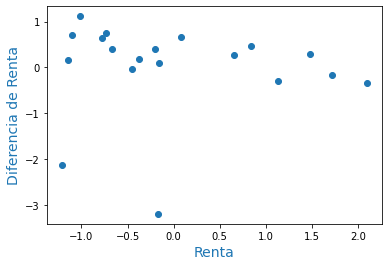

In [ ]:
# Representación de las dos variables escaladas z-score
fig, ax = plt.subplots()
ax.scatter(Datos_prep_SS[:,0], Datos_prep_SS[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()


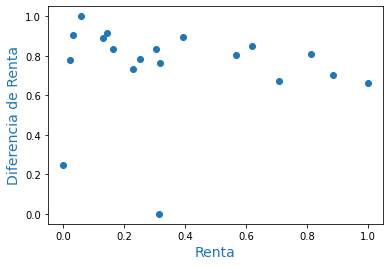

In [ ]:
# Representación de las variables escaladas Min-Max
fig, ax = plt.subplots()
ax.scatter(Datos_prep_MM[:,0], Datos_prep_MM[:,1])
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
plt.show()

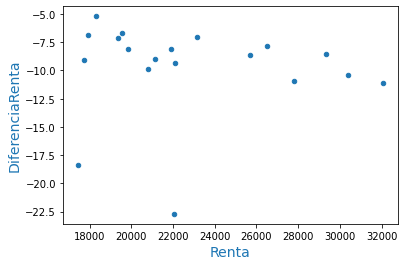

In [ ]:
# Dibujar los datos originales. Integración de matplotlib con pandas
# df.plot
fig, ax = plt.subplots()
ax.set_xlabel("Renta", fontdict = {'fontsize':14,  'color':'tab:blue'})
ax.set_ylabel("Diferencia de Renta",fontdict = {'fontsize':14,  'color':'tab:blue'})
Datos.plot(kind='scatter', x='Renta', y='DiferenciaRenta',ax=ax)